In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

In [2]:
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
df = pd.read_csv("MUSE_20211119_134612_49000.csv")
df.columns = [col.strip() for col in df.columns]
df.drop(columns=[""], inplace=True)
df.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-24,-19,4,21,-14,-7,-244,43,-24,-58,-48,-34
1,-53,-24,29,39,-41,2,-244,29,-39,-73,-68,-48
2,-19,-4,14,12,-17,4,-248,29,-39,-78,-58,-43
3,39,39,0,-39,19,19,-244,39,-34,-63,-43,-29
4,14,29,14,-21,0,21,-263,14,-63,-82,-68,-53


In [4]:
df.shape

(5000, 12)

In [5]:
df = df / 1000.0

In [ ]:
df.describe()

<AxesSubplot:ylabel='V6'>

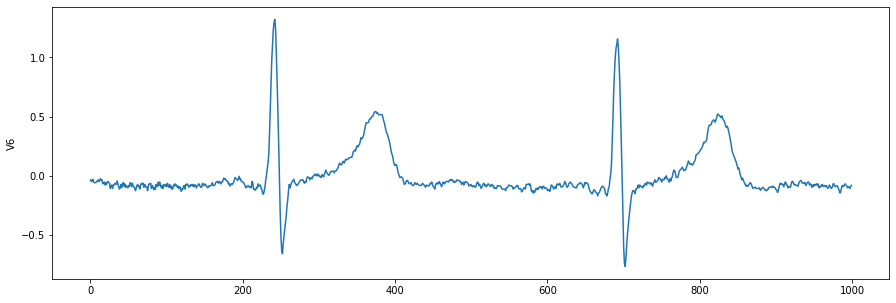

In [6]:
import seaborn as sns

sns.lineplot(data=df["V6"][:1000])

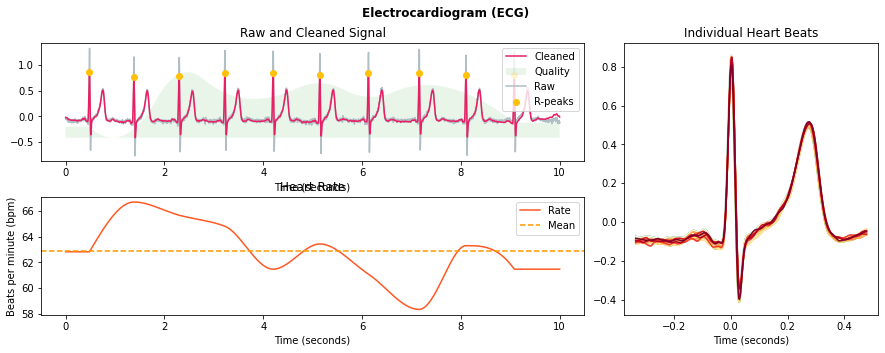

In [7]:
ecg_signals, info = nk.ecg_process(df["V6"], sampling_rate=500)
plot = nk.ecg_plot(ecg_signals, sampling_rate=500)

In [8]:
signals, info = nk.ecg_process(df["V6"], sampling_rate=500)

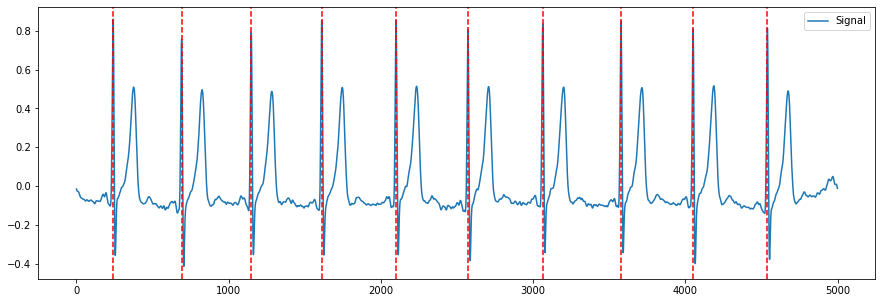

In [9]:
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
plot = nk.events_plot(rpeaks, cleaned_ecg)

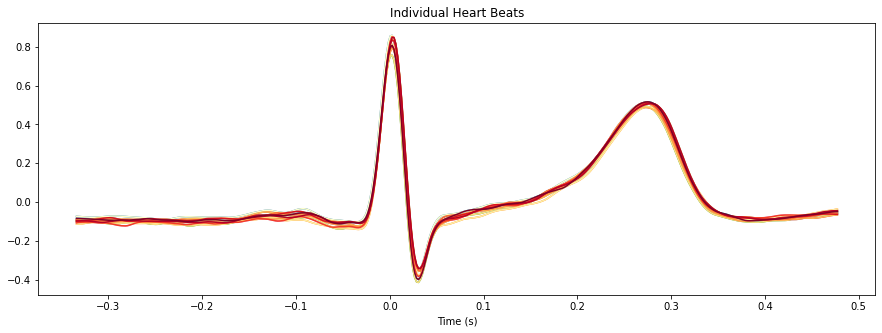

In [10]:
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=500, show=True)

## Locate P, Q, S and T waves in ECG

In [11]:
_, rpeaks = nk.ecg_peaks(df["V6"], sampling_rate=500)

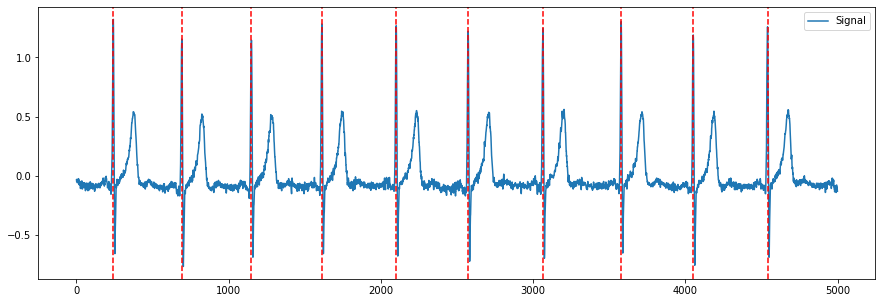

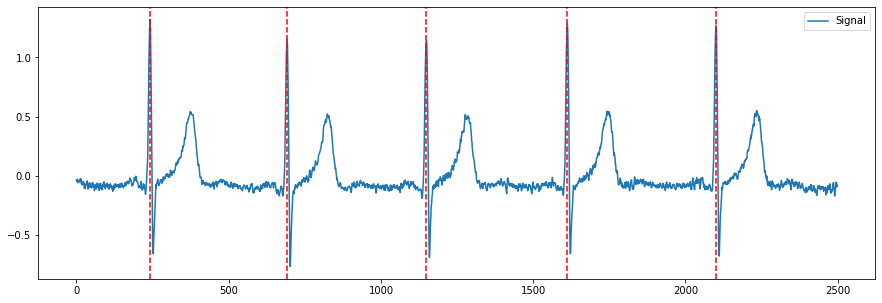

In [12]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], df["V6"])

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], df["V6"][:2500])

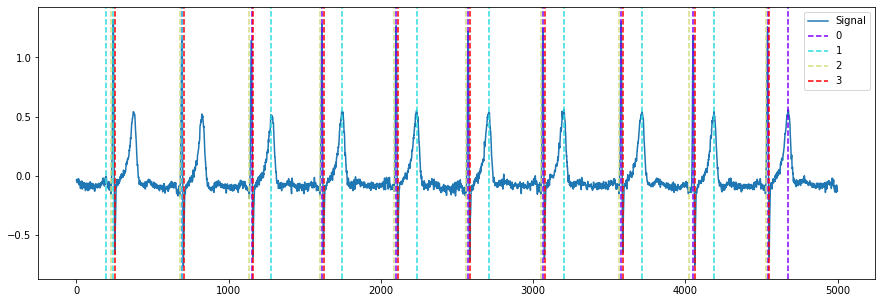

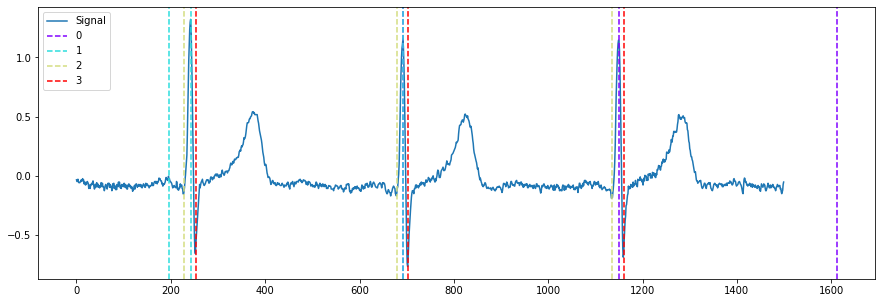

In [13]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(df["V6"], rpeaks, sampling_rate=3000, method="peak")
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], df["V6"])

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], df["V6"][:1500])

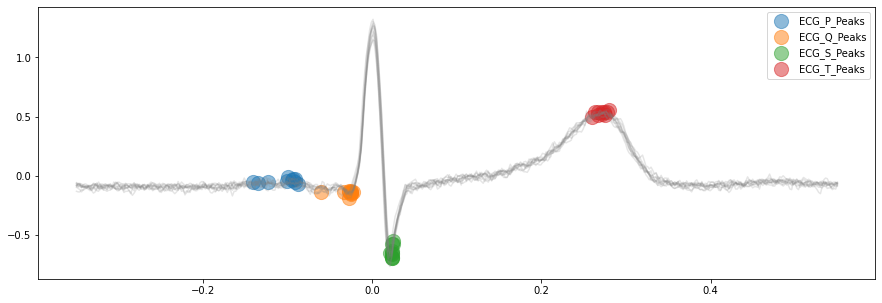

In [14]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(df["V6"], rpeaks, sampling_rate=500, method="peak", show=True, show_type='peaks')

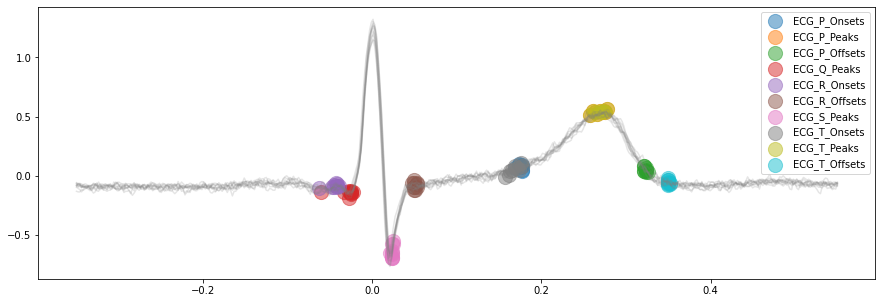

In [15]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(df["V6"], rpeaks, sampling_rate=500, method="cwt", show=True, show_type='all')

## Show only R onsets and offsets

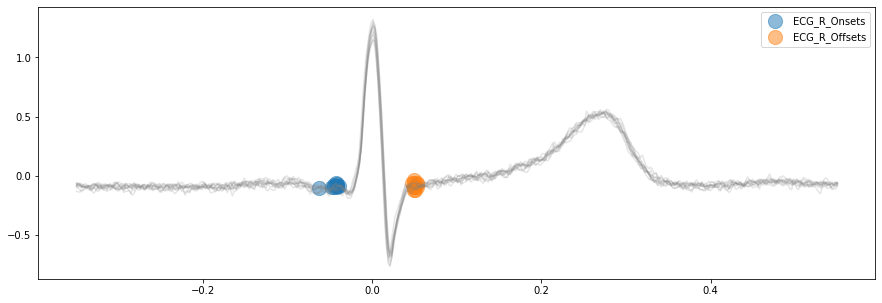

In [16]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(df["V6"], rpeaks, sampling_rate=500, method="cwt", show=True, show_type='bounds_R')

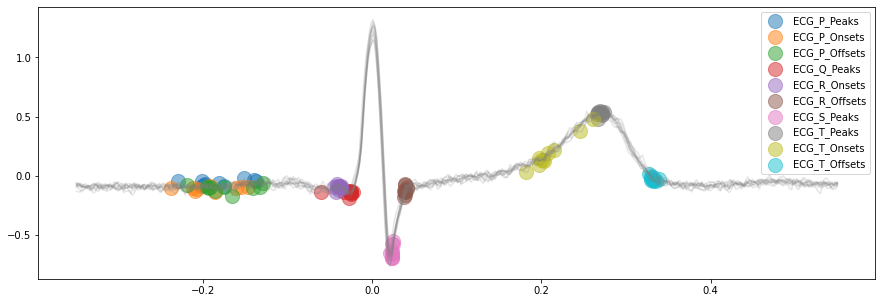

In [17]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(df["V6"], rpeaks, sampling_rate=500, method="dwt", show=True, show_type='all')

## Heart Rate Varability (HRV)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN
0,955.111111,39.434897,NaN,NaN,NaN,NaN,NaN,NaN,41.55719,43.250103,0.041288,0.04351,948.0,41.5128,0.04379,50.0,11.111111,66.666667,4.5,46.875


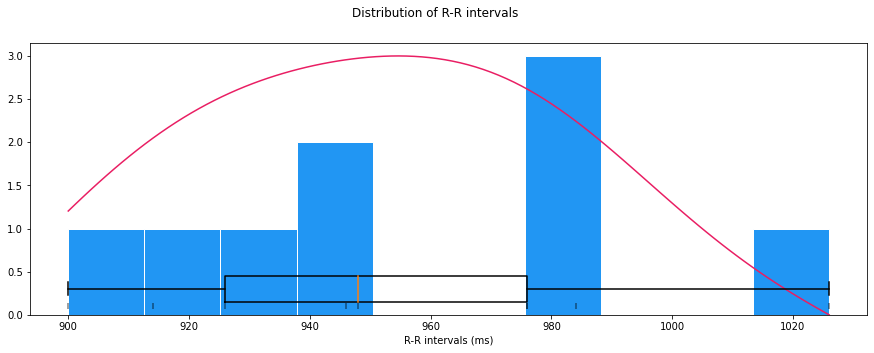

In [18]:
# Find peaks
peaks, info = nk.ecg_peaks(df["V6"], sampling_rate=500)
hrv_time = nk.hrv_time(peaks, sampling_rate=500, show=True)
hrv_time